In [11]:
import pandas as pd
# load the source data for each panel 
plt_df = pd.read_excel('./SD_SUPP_FIG4.xlsx',engine='openpyxl',sheet_name='Panel_a',index_col=0)

p-value annotation legend:
ns: 1.00e-02 < p <= 1.00e+00
*: 1.00e-03 < p <= 1.00e-02
**: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

All sentences v.s. AAC sentences: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.078e-01 U_stat=1.464e+04


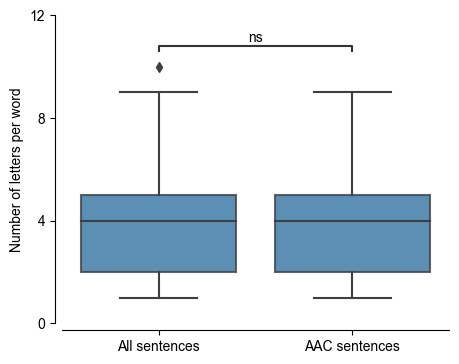

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from statannot import add_stat_annotation

fig,ax = plt.subplots(figsize=(5,4))
pvalue_thresholds = [[1e-4, "****"], [0.001, "**"], [0.01, "*"], [1, "ns"]]
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams.update({'font.size': 10})


sns.boxplot(ax=ax, data=plt_df,x='Paradigm',y='Number of letters',color=sns.color_palette().as_hex()[0],boxprops={'alpha':0.8})

test_results = add_stat_annotation(ax, data=plt_df,x='Paradigm',y='Number of letters',
                                   box_pairs = [ ('All sentences','AAC sentences')], 
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2,line_offset=0.12,pvalue_thresholds=pvalue_thresholds)


sns.despine(ax=ax, offset=dict(left=5, bottom=5))
ax.set_ylim([0,12])
ax.set_yticks([0,4,8,12])
ax.set_ylabel('Number of letters per word')
ax.set_xlabel('')
plt.savefig('./figure_S4.jpg',dpi=300,bbox_inches='tight')

In [3]:
from scipy.stats import mannwhitneyu
mannwhitneyu(plt_df[plt_df.Paradigm == 'All sentences']['Number of letters'].values
             ,plt_df[plt_df.Paradigm == 'AAC sentences']['Number of letters'].values)

MannwhitneyuResult(statistic=14640.5, pvalue=0.707815591173872)

In [9]:
plt_df[plt_df.Paradigm == 'AAC sentences']

,Number of letters,Paradigm
227,3,AAC sentences
228,4,AAC sentences
229,5,AAC sentences
230,4,AAC sentences
231,4,AAC sentences
...,...,...
348,2,AAC sentences
349,8,AAC sentences
350,2,AAC sentences
351,6,AAC sentences


In [10]:
plt_df[plt_df.Paradigm == 'All sentences']

,Number of letters,Paradigm
0,5,All sentences
1,7,All sentences
2,3,All sentences
3,4,All sentences
4,4,All sentences
...,...,...
222,4,All sentences
223,6,All sentences
224,2,All sentences
225,4,All sentences
